<a href="https://colab.research.google.com/github/HungNguyen205/HK5--ThucHanhTriTueNhanTao/blob/main/THTTNT_2001230284_NguyenCaoManhHung_Buoi04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align ="center"><font color ="purple">⛅Báo Cáo Thực Hành Trí Tuệ Nhân Tạo</font></h1>
<h3>🚩Tuần 4 - Chủ đề: CÁC PHƯƠNG PHÁP GIẢI BÀI TOÁN THỎA MÃN RÀNG BUỘC - THUẬT TOÁN TÔ MÀU ĐỒ THỊ</h3>

---

**Họ và tên:** Nguyễn Cao Mạnh Hùng<br/>
**MSSV:** 2001230284


## PHẦN 1: TỔNG QUAN (INTRODUCTION)

### 1.1. Đặt vấn đề

Trong khoa học máy tính và toán học ứng dụng, việc tìm kiếm lời giải tối ưu cho các hệ thống phức tạp luôn là một thách thức lớn. Một lớp bài toán quan trọng trong số đó là **Bài toán thỏa mãn ràng buộc (Constraint Satisfaction Problems - CSP)**. Khác với các bài toán tìm kiếm thông thường, CSP yêu cầu lời giải phải tuân thủ nghiêm ngặt một tập hợp các quy tắc định trước.

**Bài toán Tô màu đồ thị (Graph Coloring)** là một đại diện kinh điển của CSP. Việc giải quyết bài toán này có ý nghĩa to lớn trong thực tiễn, từ việc lập lịch biểu, phân chia tần số vô tuyến đến tối ưu hóa thanh ghi trong máy tính. Tuy nhiên, việc tìm ra số màu tối thiểu (sắc số) cho một đồ thị tổng quát thuộc lớp bài toán NP-Hard, đòi hỏi các phương pháp tiếp cận thông minh hơn là vét cạn.

### 1.2. Mục tiêu báo cáo

Báo cáo này hướng tới các mục tiêu cụ thể sau:

1.  Hệ thống hóa cơ sở lý thuyết về CSP và bài toán tô màu đồ thị.
2.  Phân tích thuật toán tô màu tối ưu sử dụng phương pháp heuristic dựa trên bậc của đỉnh (Degree-based Heuristic).
3.  Đưa ra thiết kế chi tiết để xây dựng chương trình giải quyết bài toán, bao gồm định nghĩa dữ liệu và giải thuật.

## PHẦN 2: CƠ SỞ LÝ THUYẾT (THEORETICAL BACKGROUND)

### 2.1. Lý thuyết về Bài toán Thỏa mãn ràng buộc (CSP)

**Định nghĩa:** Một bài toán CSP được xác định bởi bộ ba $(X, D, C)$:

  * **$X = \{X_1, X_2, \dots, X_n\}$**: Là tập hợp hữu hạn các biến cần tìm giá trị.
  * **$D = \{D_1, D_2, \dots, D_n\}$**: Là tập hợp các miền giá trị, trong đó mỗi biến $X_i$ nhận giá trị thuộc $D_i$.
  * **$C$**: Là tập hợp hữu hạn các ràng buộc. Ràng buộc là một quan hệ trên một tập con các biến, giới hạn các tổ hợp giá trị mà các biến đó có thể nhận đồng thời.

**Ràng buộc có thể biểu diễn bằng:**

  * Một biểu thức toán học/logic (Ví dụ: $X_i \neq X_j$).
  * Một bảng liệt kê (Table enumeration) các phép gán giá trị hợp lệ.

**Lời giải:** Một lời giải thỏa mãn ràng buộc là một phép gán đầy đủ giá trị cho tất cả các biến trong $X$ sao cho không vi phạm bất kỳ ràng buộc nào trong $C$.

### 2.2. Bài toán Tô màu đồ thị (Graph Coloring)

**Phát biểu bài toán:**
Cho một đồ thị vô hướng $G = (V, E)$, trong đó $V$ là tập đỉnh và $E$ là tập cạnh.

  * **Biến:** Mỗi đỉnh $v \in V$ là một biến.
  * **Miền giá trị:** Tập hợp các màu $K = \{1, 2, \dots, m\}$.
  * **Ràng buộc:** Hai đỉnh kề nhau không được tô cùng màu.
    $$\forall (u, v) \in E \Rightarrow Color(u) \neq Color(v)$$

**Mục tiêu tối ưu:** Tìm giá trị $m$ nhỏ nhất (gọi là Sắc số - Chromatic Number, ký hiệu $\chi(G)$) sao cho tồn tại phép gán màu hợp lệ.

**Nhận định lý thuyết:**
Do tính chất NP-Hard, thời gian tính toán lời giải chính xác tăng theo hàm mũ đối với số đỉnh. Do đó, các thuật toán Heuristic bằng phương pháp dựa trên bậc đỉnh như tô màu đồ thịthường được ưu tiên sử dụng để tìm lời giải gần tối ưu hoặc tối ưu trong thời gian đa thức.

## PHẦN 3: THUẬT TOÁN GIẢI QUYẾT (ALGORITHM)

### 3.1. Nguyên lý hoạt động

Thuật toán dựa trên nhận định: *Đỉnh có bậc càng cao thì càng khó tô màu do bị ràng buộc bởi nhiều láng giềng. Cần ưu tiên giải quyết đỉnh này sớm nhất.* Sau khi tô màu xong, đỉnh đó coi như "đã được giải quyết", do đó ta có thể "loại bỏ" nó khỏi đồ thị xét duyệt bằng cách hạ bậc các đỉnh lân cận.

### 3.2. Các bước của thuật toán

Quy trình lặp lại cho đến khi tất cả các đỉnh đều được tô màu:

  * **Bước 1: Lựa chọn đỉnh (Selection)**

      * Trong số các đỉnh chưa được tô màu, chọn đỉnh $v$ có **bậc hiện tại lớn nhất**.
      * Nếu có nhiều đỉnh có cùng bậc lớn nhất, chọn đỉnh có chỉ số nhỏ nhất (hoặc ngẫu nhiên).
      * Gán cho đỉnh $v$ một màu $i$ nhỏ nhất có thể trong tập màu, sao cho màu $i$ không trùng với màu của bất kỳ đỉnh lân cận nào đã được tô trước đó (không nằm trong danh sách cấm).

  * **Bước 2: Hạ bậc (Degree Reduction)**

      * Đánh dấu đỉnh $v$ là **Đã tô màu** (Gán bậc của $v = 0$ hoặc loại khỏi danh sách xét).
      * Với mọi đỉnh $u$ kề với $v$ và chưa được tô màu: Thực hiện giảm bậc của $u$ đi 1 ($Degree[u] := Degree[u] - 1$).
      * *Ý nghĩa:* Việc giảm bậc phản ánh rằng đỉnh $u$ giờ đây có ít hơn một "láng giềng chưa được giải quyết", thay đổi độ ưu tiên của $u$ trong các bước lặp sau.

  * **Bước 3: Lan truyền ràng buộc (Constraint Propagation)**

      * Cập nhật thông tin cho các đỉnh lân cận: Đánh dấu màu $i$ (màu vừa tô cho $v$) là "Cấm" đối với các đỉnh $u$ kề $v$.
      * Khi đến lượt tô màu đỉnh $u$, thuật toán sẽ bỏ qua các màu bị cấm này.

## PHẦN 4: ỨNG DỤNG THỰC TIỄN (APPLICATIONS)

Thuật toán này có khả năng ứng dụng rộng rãi trong các bài toán thực tế yêu cầu phân bổ tài nguyên không xung đột:

1.  **Lập lịch thi (Exam Timetabling):**
      * Mỗi môn thi là một đỉnh. Nếu hai môn thi có chung sinh viên dự thi, ta nối cạnh (ràng buộc không thể thi cùng giờ).
      * Thuật toán giúp tìm số lượng ca thi (màu) ít nhất, ưu tiên xếp lịch cho các môn đại cương đông sinh viên (bậc lớn) trước.
2.  **Cấp phát thanh ghi (Register Allocation) trong Trình biên dịch:**
      * Các biến trong chương trình là đỉnh. Cạnh nối xuất hiện nếu hai biến cùng tồn tại tại một thời điểm.
      * Thuật toán gán biến vào các thanh ghi CPU (màu) hữu hạn để tối ưu tốc độ xử lý.
3.  **Xếp lịch làm việc/Phân công công tác:**
      * Nhân sự là đỉnh, ca làm việc là màu. Ràng buộc là các nhân sự không thể làm việc cùng nhau hoặc xung đột kỹ năng.

## PHẦN 5: THIẾT KẾ VÀ XÂY DỰNG CHƯƠNG TRÌNH

Tạo dữ liệu đồ thị (Ma trận kề)

In [15]:
#Tạo file txt chứa ma trận kề
%%writefile graph.txt
0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0

Overwriting graph.txt


Hàm tiện ích để load dữ liệu từ file text vào mảng 2 chiều

In [16]:
import os

def loadGraph(filename):
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                # Chuyển đổi chuỗi số trong dòng thành list số nguyên
                row = [int(x) for x in line.strip().split()]
                if row: # Bỏ qua dòng trống
                    matrix.append(row)
        print(f"-> Đã đọc file '{filename}' thành công.") #Đọc file thành công
        return matrix
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {filename}") #Không tìm thấy file
        return None

Thuật toán tô màu đồ thị

In [21]:
import networkx as nx #Thư viện dùng để vẽ đồ thị
import matplotlib.pyplot as plt
import pandas as pd #Thư viện dùng để vẽ bảng
from IPython.display import display

# --- HÀM VẼ ĐỒ THỊ ---
def draw_graph_step(G_nx, pos, current_solution, step_num, node_names, selected_node):
    """Vẽ đồ thị và làm nổi bật đỉnh vừa được tô"""
    plt.figure(figsize=(5, 3))

    node_colors = []
    edge_colors = []

    for node in G_nx.nodes():
        if node in current_solution:
            node_colors.append(current_solution[node].lower())
        else:
            node_colors.append('lightgray') # Màu mặc định chưa tô

    # Vẽ đồ thị
    nx.draw(G_nx, pos,
            with_labels=True,
            node_color=node_colors,
            node_size=800,
            font_weight='bold',
            edge_color='gray')

    plt.title(f"Bước {step_num}: Đã chọn đỉnh {selected_node}")
    plt.show()

# --- HÀM CHÍNH ---
def graph_coloring_visualized(G):
    num_nodes = len(G)
    nodes = [chr(65 + i) for i in range(num_nodes)] # A, B, C...

    # 1. Dùng NetworkX vẽ
    G_nx = nx.Graph()
    for i in range(num_nodes):
        G_nx.add_node(nodes[i])
        for j in range(i + 1, num_nodes):
            if G[i][j] == 1:
                G_nx.add_edge(nodes[i], nodes[j])
    pos = nx.circular_layout(G_nx)

    # 2. Thuật toán
    # Tính bậc ban đầu
    current_degrees = [sum(G[i]) for i in range(num_nodes)]
    theSolution = {}
    forbidden_colors = {i: set() for i in range(num_nodes)}
    # Kho màu dùng để tô
    color_names = ["Blue", "Red", "Yellow", "Green", "Purple", "Orange"]

    step_count = 0

    # VÒNG LẶP CHÍNH
    while len(theSolution) < num_nodes:
        step_count += 1
        print(f"\n")
        print(f"\n" + "="*40)
        print(f"CHUẨN BỊ BƯỚC {step_count}")

        # --- HIỂN THỊ BẢNG SỐ BẬC ---
        # Tạo dữ liệu trạng thái để hiển thị
        status_list = []
        for n in nodes:
            if n in theSolution:
                status_list.append(f"Đã tô ({theSolution[n]})")
            else:
                status_list.append("Chưa tô")

        # Tạo DataFrame (Bảng)
        df = pd.DataFrame([current_degrees, status_list],
                          columns=nodes,
                          index=["Bậc hiện tại", "Trạng thái"])

        # Hiển thị bảng ra màn hình
        print("Bảng bậc các đỉnh:")
        display(df)
        # -----------------------------

        # BƯỚC 1: Chọn đỉnh bậc lớn nhất
        max_degree = -1
        selected_idx = -1

        for i in range(num_nodes):
            if nodes[i] not in theSolution:
                if current_degrees[i] > max_degree:
                    max_degree = current_degrees[i]
                    selected_idx = i
                # Nếu bậc bằng nhau, code này ưu tiên index nhỏ hơn (A trước B...)

        if selected_idx == -1: break

        # Chọn màu
        color_code = 0
        while color_code in forbidden_colors[selected_idx]:
            color_code += 1

        current_node_name = nodes[selected_idx]
        theSolution[current_node_name] = color_names[color_code]

        print(f"---> QUYẾT ĐỊNH: Chọn đỉnh {current_node_name} (Bậc = {max_degree}) -> Tô màu {color_names[color_code]}")

        # Vẽ hình
        draw_graph_step(G_nx, pos, theSolution, step_count, nodes, current_node_name)

        # BƯỚC 2 & 3: Hạ bậc và Cấm màu
        # Đỉnh vừa tô -> Bậc về 0
        current_degrees[selected_idx] = 0

        # Xử lý hàng xóm
        adjacent_row = G[selected_idx]
        for neighbor_idx in range(num_nodes):
            if adjacent_row[neighbor_idx] == 1 and (nodes[neighbor_idx] not in theSolution):
                # Giảm bậc hàng xóm
                current_degrees[neighbor_idx] -= 1
                # Cấm màu
                forbidden_colors[neighbor_idx].add(color_code)

    return theSolution

Thực thi Thuật toán tô màu đồ thị

--- KẾT QUẢ TÔ MÀU ĐỒ THỊ ---
-> Đã đọc file 'graph.txt' thành công.



CHUẨN BỊ BƯỚC 1
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,3,4,4,3,3,3
Trạng thái,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh B (Bậc = 4) -> Tô màu Blue


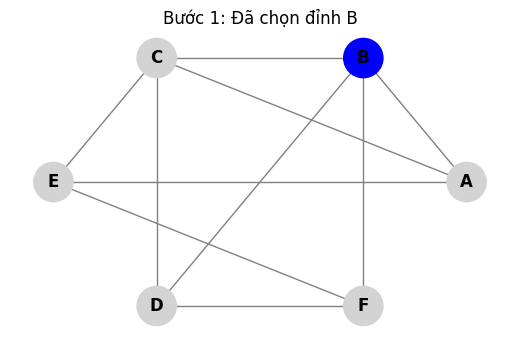




CHUẨN BỊ BƯỚC 2
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,2,0,3,2,3,2
Trạng thái,Chưa tô,Đã tô (Blue),Chưa tô,Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh C (Bậc = 3) -> Tô màu Red


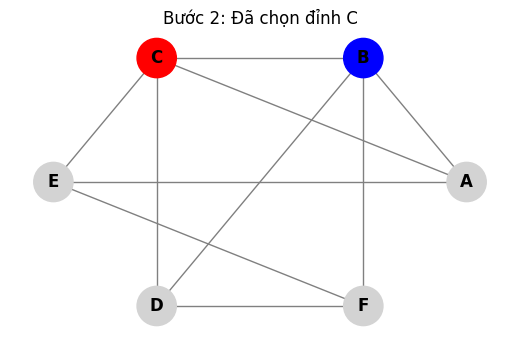




CHUẨN BỊ BƯỚC 3
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,1,0,0,1,2,2
Trạng thái,Chưa tô,Đã tô (Blue),Đã tô (Red),Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh E (Bậc = 2) -> Tô màu Blue


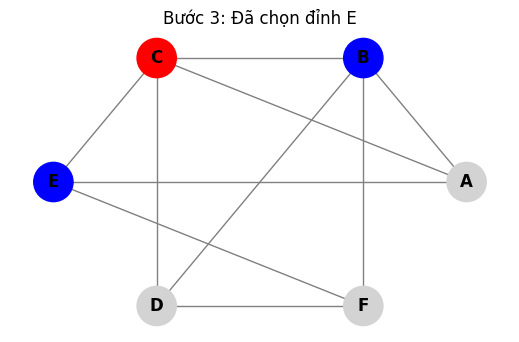




CHUẨN BỊ BƯỚC 4
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,0,0,0,1,0,1
Trạng thái,Chưa tô,Đã tô (Blue),Đã tô (Red),Chưa tô,Đã tô (Blue),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh D (Bậc = 1) -> Tô màu Yellow


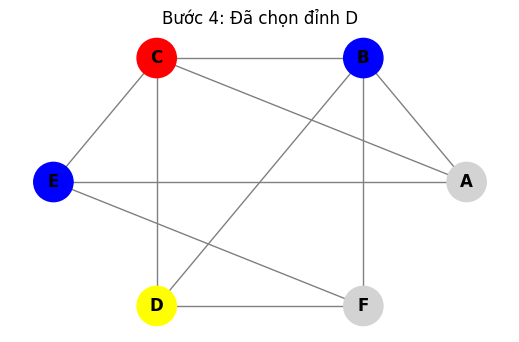




CHUẨN BỊ BƯỚC 5
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,0,0,0,0,0,0
Trạng thái,Chưa tô,Đã tô (Blue),Đã tô (Red),Đã tô (Yellow),Đã tô (Blue),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh A (Bậc = 0) -> Tô màu Yellow


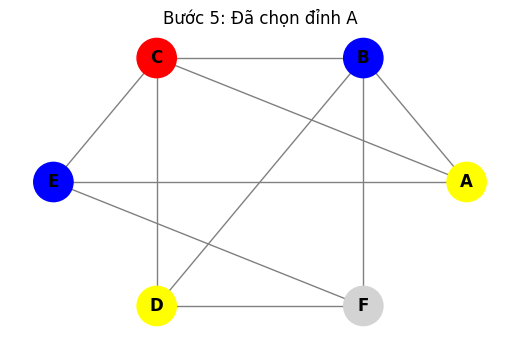




CHUẨN BỊ BƯỚC 6
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,0,0,0,0,0,0
Trạng thái,Đã tô (Yellow),Đã tô (Blue),Đã tô (Red),Đã tô (Yellow),Đã tô (Blue),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh F (Bậc = 0) -> Tô màu Red


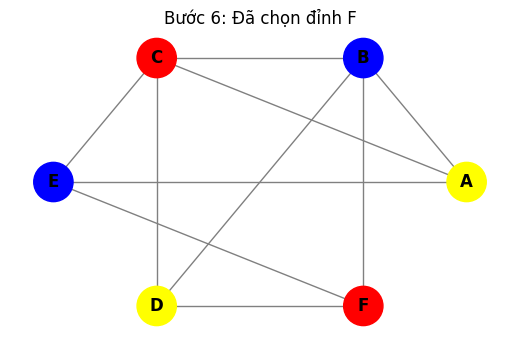


=== KẾT QUẢ CUỐI CÙNG ===
Đỉnh A: Màu Yellow
Đỉnh B: Màu Blue
Đỉnh C: Màu Red
Đỉnh D: Màu Yellow
Đỉnh E: Màu Blue
Đỉnh F: Màu Red


In [22]:
print("--- KẾT QUẢ TÔ MÀU ĐỒ THỊ ---")
# 1. Load file
G = loadGraph("graph.txt")

if G:
    # 2. Chạy thuật toán
    result = graph_coloring_visualized(G)

    # 3. Tổng kết
    print("\n=== KẾT QUẢ CUỐI CÙNG ===")
    for node in sorted(result.keys()):
        print(f"Đỉnh {node}: Màu {result[node]}")

<b>TÔ MÀU ĐỒ THỊ SINH NGẪU NHIÊN</b>

In [23]:
import random
import os

def generate_and_save_graph(filename):
    """
    Người dùng nhập số đỉnh, sau đó tự sinh ngẫu nhiên
    ma trận kề rồi lưu vào file txt
    """
    try:
        # 1. Nhập số lượng đỉnh
        print("--- TẠO DỮ LIỆU ---")
        n_input = input("Nhập số lượng đỉnh (n) của đồ thị: ")
        n = int(n_input)

        if n <= 0:
            print("Số đỉnh phải lớn hơn 0.")
            return False

        # 2. Khởi tạo ma trận n x n toàn số 0
        matrix = [[0] * n for _ in range(n)]

        # 3. Sinh ngẫu nhiên ma trận
        # Chỉ xét phần bên phải đường chéo chính
        for i in range(n):
            for j in range(i + 1, n):
                # Random 0 hoặc 1
                val = random.randint(0, 1)

                # Gán giá trị cho tam giác trên
                matrix[i][j] = val

                # Lấy đối xứng cho tam giác dưới
                matrix[j][i] = val

        # Đường chéo chính matrix[i][i] mặc định đã là 0

        # 4. Lưu vào file txt
        with open(filename, 'w') as f:
            for row in matrix:
                # Chuyển list [0, 1, 0] thành chuỗi "0 1 0" và ghi vào file
                line = " ".join(map(str, row))
                f.write(line + "\n")

        print(f"-> Đã sinh ma trận {n}x{n} và lưu vào '{filename}'.")
        return True

    except ValueError:
        print("Lỗi: Vui lòng nhập một số nguyên hợp lệ.")
        return False

Thực thi Thuật toán tô màu đồ thị với số đỉnh được người dùng nhập từ bàn phím

--- TẠO DỮ LIỆU ---
Nhập số lượng đỉnh (n) của đồ thị: 8
-> Đã sinh ma trận 8x8 và lưu vào 'random_graph.txt'.

--- BẮT ĐẦU GIẢI THUẬT TÔ MÀU ---
-> Đã đọc file 'random_graph.txt' thành công.
Ma trận kề đã sinh:
[0, 1, 0, 0, 0, 1, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 1]
[0, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 1, 0]



CHUẨN BỊ BƯỚC 1
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,2,3,2,3,6,4,3,3
Trạng thái,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh E (Bậc = 6) -> Tô màu Blue


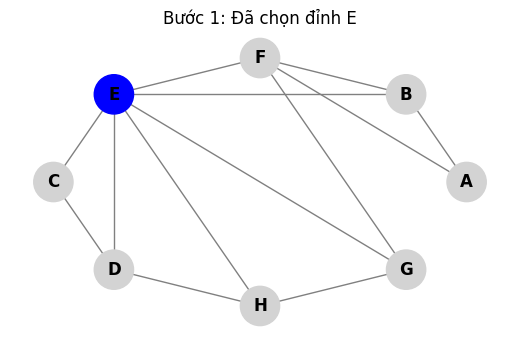




CHUẨN BỊ BƯỚC 2
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,2,2,1,2,0,3,2,2
Trạng thái,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Đã tô (Blue),Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh F (Bậc = 3) -> Tô màu Red


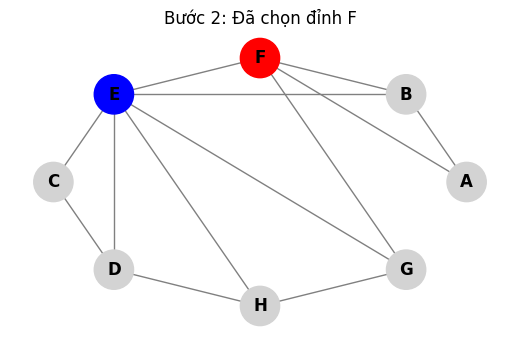




CHUẨN BỊ BƯỚC 3
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,1,1,1,2,0,0,1,2
Trạng thái,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Đã tô (Blue),Đã tô (Red),Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh D (Bậc = 2) -> Tô màu Red


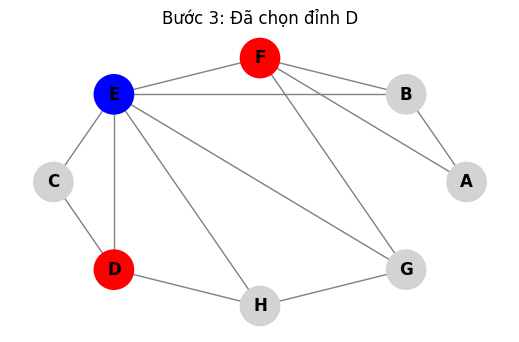




CHUẨN BỊ BƯỚC 4
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,1,1,0,0,0,0,1,1
Trạng thái,Chưa tô,Chưa tô,Chưa tô,Đã tô (Red),Đã tô (Blue),Đã tô (Red),Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh A (Bậc = 1) -> Tô màu Blue


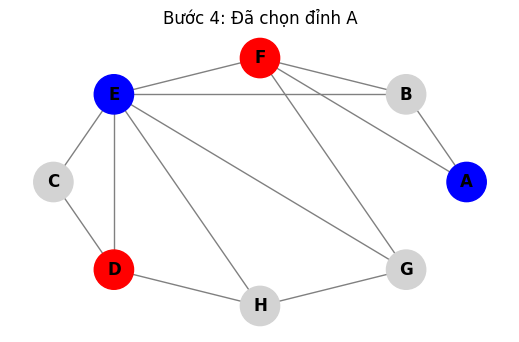




CHUẨN BỊ BƯỚC 5
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,0,0,0,0,0,0,1,1
Trạng thái,Đã tô (Blue),Chưa tô,Chưa tô,Đã tô (Red),Đã tô (Blue),Đã tô (Red),Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh G (Bậc = 1) -> Tô màu Yellow


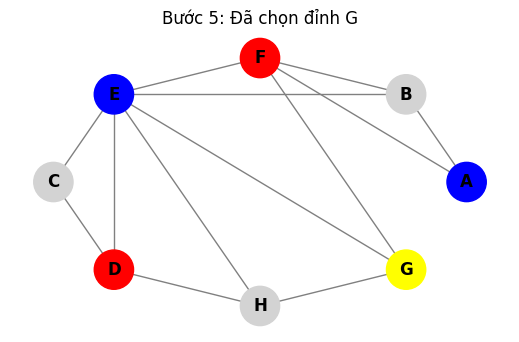




CHUẨN BỊ BƯỚC 6
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,0,0,0,0,0,0,0,0
Trạng thái,Đã tô (Blue),Chưa tô,Chưa tô,Đã tô (Red),Đã tô (Blue),Đã tô (Red),Đã tô (Yellow),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh B (Bậc = 0) -> Tô màu Yellow


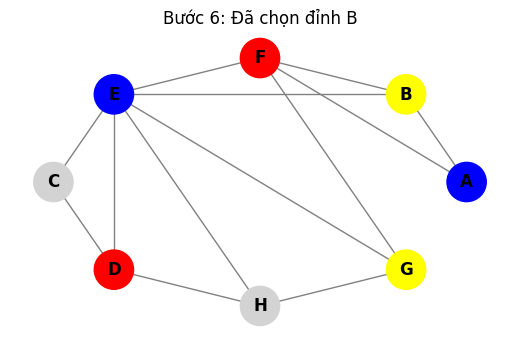




CHUẨN BỊ BƯỚC 7
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,0,0,0,0,0,0,0,0
Trạng thái,Đã tô (Blue),Đã tô (Yellow),Chưa tô,Đã tô (Red),Đã tô (Blue),Đã tô (Red),Đã tô (Yellow),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh C (Bậc = 0) -> Tô màu Yellow


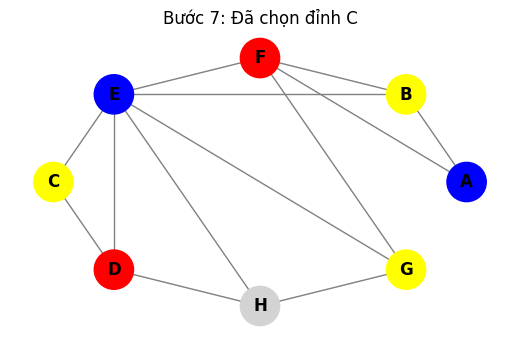




CHUẨN BỊ BƯỚC 8
Bảng bậc các đỉnh:


,A,B,C,D,E,F,G,H
Bậc hiện tại,0,0,0,0,0,0,0,0
Trạng thái,Đã tô (Blue),Đã tô (Yellow),Đã tô (Yellow),Đã tô (Red),Đã tô (Blue),Đã tô (Red),Đã tô (Yellow),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh H (Bậc = 0) -> Tô màu Green


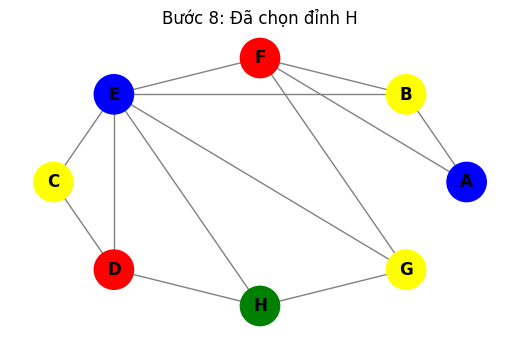


=== KẾT QUẢ CUỐI CÙNG ===
Đỉnh A: Blue
Đỉnh B: Yellow
Đỉnh C: Yellow
Đỉnh D: Red
Đỉnh E: Blue
Đỉnh F: Red
Đỉnh G: Yellow
Đỉnh H: Green


In [24]:
FILE_NAME = "random_graph.txt"

# 1. Gọi hàm sinh dữ liệu
is_created = generate_and_save_graph(FILE_NAME)

if is_created:
    print("\n--- BẮT ĐẦU GIẢI THUẬT TÔ MÀU ---")

    # 2. Đọc file vừa tạo
    G = loadGraph(FILE_NAME)

    if G:
        # In ma trận ra để kiểm tra tính đối xứng
        if len(G) <= 10:
            print("Ma trận kề đã sinh:")
            for row in G:
                print(row)

        # 3. Chạy thuật toán tô màu
        result = graph_coloring_visualized(G)

        # 4. Kết quả cuối cùng
        print("\n=== KẾT QUẢ CUỐI CÙNG ===")
        for node in sorted(result.keys()):
            print(f"Đỉnh {node}: {result[node]}")